# Imports

In [1]:
# Import necessary modules
import os
from lib.streaming.streaming import run_streaming

# Variables

In [2]:
# input_fastq_filename = "test-combined.fastq"
input_fastq_filename = "rbcL_Qiagen_tomato_5000.fastq"
windows = False
db = "matK"

In [3]:
input_fastq_path = os.path.join("assets","input", input_fastq_filename)
base_name = os.path.splitext(input_fastq_filename)[0]

# Streaming Pipeline

In [4]:
# choose a streaming method between the following:
# - "basic_streaming"

streaming_method = "basic_streaming"

# choose a consensus method between the following:
# - "80_20_best_sequence"
# - "80_20_longest_sequence"
# - "straightforward_best_sequence"

consensus_method = "80_20_best_sequence"

# choose an identification method between the following:
# - "blastn"

identification_method = "blastn"

# define the streaming parameters
species_identification_percentage_dominance = 0.7
minimum_block_amount_before_dominance_check = 5
block_size = 250

run_streaming(input_name= base_name, 
              input_fastq_path= input_fastq_path, 
              streaming_method= streaming_method,
              db= db,
              windows= windows,
              species_identification_percentage_dominance=species_identification_percentage_dominance,
              block_size=block_size,
              minimum_block_amount_before_dominance_check=minimum_block_amount_before_dominance_check,
              consensus_method=consensus_method,
              identification_method=identification_method)

Logging set up at assets/output/streaming/rbcL_Qiagen_tomato_5000/rbcL_Qiagen_tomato_5000_streaming_pipeline_log.log
Block 1 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_1
Block 2 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_2
Block 3 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_3
Block 4 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_4
Block 5 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_5
Block 6 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_6


In [5]:
def run_multiple_times(block_sizes, num_runs):
    for size in block_sizes:
        for _ in range(num_runs):
            # Run the streaming function
            run_streaming(input_name=base_name,
                          input_fastq_path=input_fastq_path,
                          streaming_method=streaming_method,
                          db=db,
                          windows=windows,
                          species_identification_percentage_dominance=0.7,
                          block_size=size,
                          minimum_block_amount_before_dominance_check=5,
                          consensus_method=consensus_method,
                          identification_method=identification_method)

In [7]:
# Define block sizes and number of runs
block_sizes = [50, 100, 200, 500, 1000]
num_runs = 10

# Run the function and get results
run_multiple_times(block_sizes, num_runs)

Logging set up at assets/output/streaming/rbcL_Qiagen_tomato_5000/rbcL_Qiagen_tomato_5000_streaming_pipeline_log.log
Block 1 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_1
Block 2 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_2
Block 3 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_3
Block 4 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_4
Block 5 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_5
Block 6 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_6
Logging set up at assets/output/streaming/rbcL_Qiagen_tomato_5000/rbcL_Qiagen_tomato_5000_streaming_pipeline_log.log
Block 1 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_1
Block 2 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_2
Block 3 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_3
Block 4 saved at assets/output/streaming/rbcL_Qiagen_tomato_5000/block_4
Block 5 saved at assets/output/strea

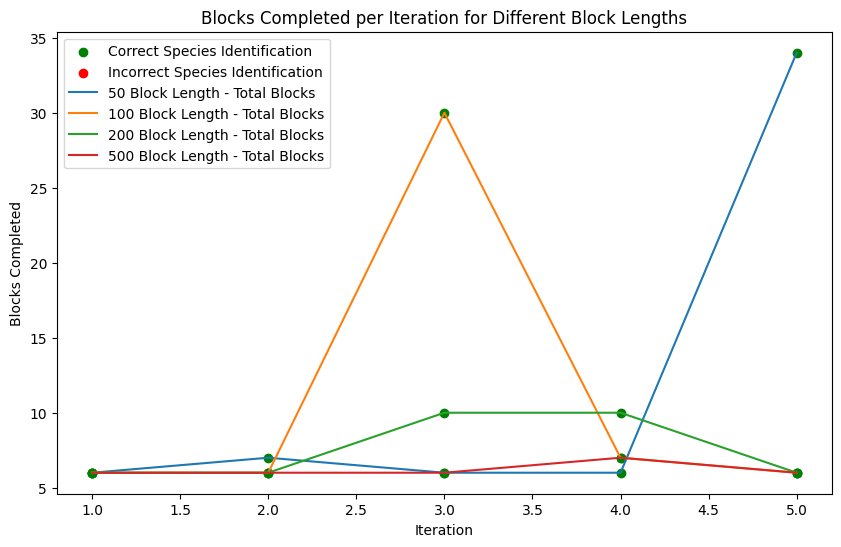

In [30]:
import json
import matplotlib.pyplot as plt

streaming_data_json = open("data.json").read()

def plot_blocks_completed(data):
    block_data = json.loads(data)
    plt.figure(figsize=(10, 6))

    # Initial dummy plots for legend (correct and incorrect identification)
    plt.scatter([], [], color='green', label='Correct Species Identification')
    plt.scatter([], [], color='red', label='Incorrect Species Identification')

    for block_length, iterations in block_data.items():
        x = []  # Iterations
        y = []  # Blocks completed

        for iteration in iterations:
            x.append(iteration['iteration'])
            y.append(iteration['blocks_completed'])

            # Check if the correct species was identified
            correct_species_identified = any(species == "Solanum lycopersicum" for species in iteration['identified_species'])

            # Plot each point with the appropriate color
            plt.scatter(iteration['iteration'], iteration['blocks_completed'], 
                        color='green' if correct_species_identified else 'red')

        # Plot lines for each block length
        plt.plot(x, y, label=f"{block_length} - Total Blocks")

    plt.xlabel('Iteration')
    plt.ylabel('Blocks Completed')
    plt.title('Blocks Completed per Iteration for Different Block Lengths')
    plt.legend()
    plt.show()

plot_blocks_completed(streaming_data_json)

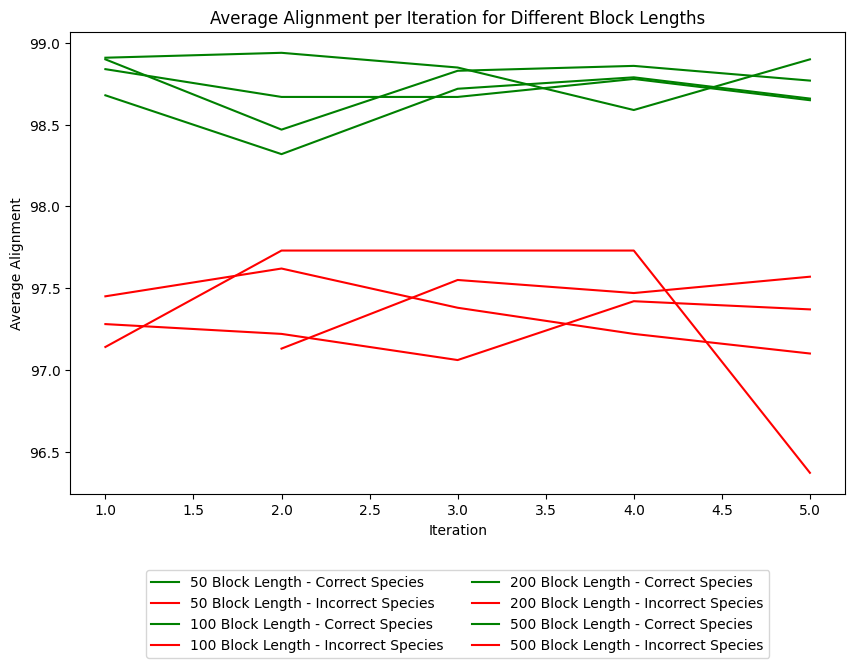

In [27]:
import json
import matplotlib.pyplot as plt

streaming_data_json = open("data.json").read()

def plot_alignment(data):
    block_data = json.loads(data)
    plt.figure(figsize=(10, 6))

    for block_length, iterations in block_data.items():
        x_correct = []  # iterations: correct species
        y_correct = []  # average_alignment: correct species

        x_incorrect = []  # iterations: incorrect species
        y_incorrect = []  # average_alignment: incorrect species

        for iteration in iterations:
            for identified_species in iteration['identified_species']:
                iteration_value = int(iteration['iteration'])  # Convert iteration to integer

                if identified_species == "Solanum lycopersicum":
                    x_correct.append(iteration_value)
                    y_correct.append(iteration['identified_species'][identified_species]['average_alignment'])

                if identified_species != "Solanum lycopersicum":
                    x_incorrect.append(iteration_value)
                    y_incorrect.append(iteration['identified_species'][identified_species]['average_alignment'])

        plt.plot(x_correct, y_correct, label=f"{block_length} - Correct Species", color='green')
        plt.plot(x_incorrect, y_incorrect, label=f"{block_length} - Incorrect Species", color='red')

    plt.xlabel('Iteration')
    plt.ylabel('Average Alignment')
    plt.title('Average Alignment per Iteration for Different Block Lengths')
    
    # Adjusting legend position
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.show()

plot_alignment(streaming_data_json)